# Lengths of Random Chords

- If a chord is selected at random on a fixed circle, what is the probability that its length exceeds the radius of the circle?

____

- First, we visualize the unit circle

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 10

(-1, 1)

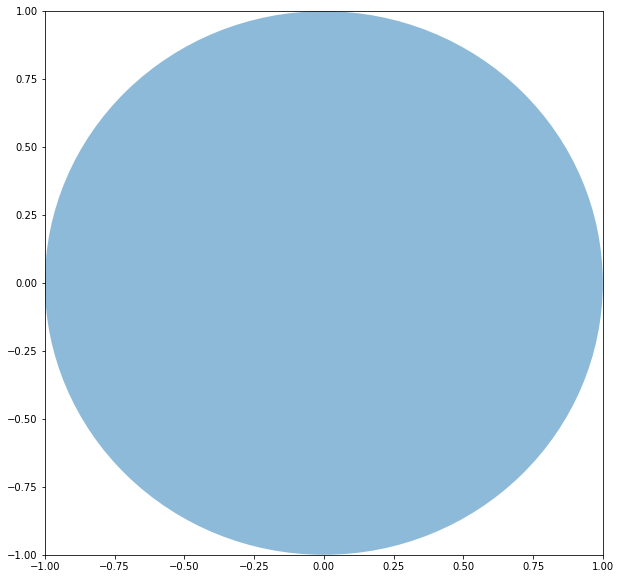

In [9]:
unit_circle = plt.Circle((0, 0), radius=1, alpha=0.5)
fig, ax = plt.subplots()
ax.add_artist(unit_circle)
plt.xlim([-1, 1])
plt.ylim([-1, 1])

- Now, we pick a random spot on the circumference
    - WLOG we can pick the point at (0, -1)

(-1.1, 1)

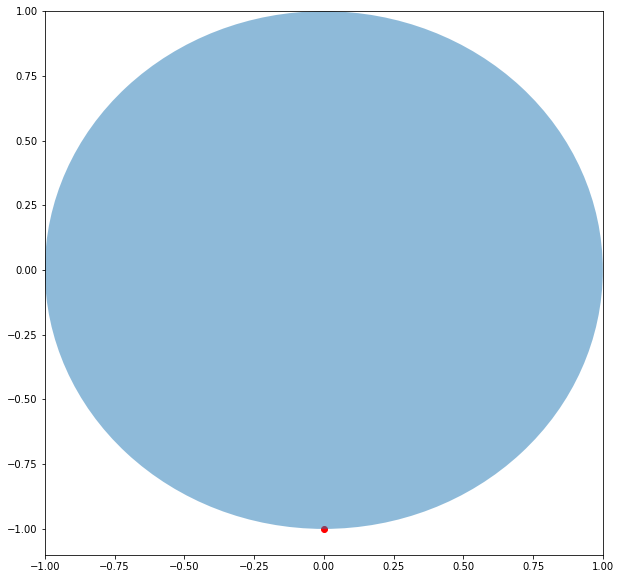

In [14]:
unit_circle = plt.Circle((0, 0), radius=1, alpha=0.5)
fig, ax = plt.subplots()
ax.add_artist(unit_circle)
plt.scatter([0], [-1], c='r')
plt.xlim([-1, 1])
plt.ylim([-1.1, 1])

- For us to draw a chord of length greater than the radius, that means the point lies further than length 1 away from the red dot
    - To visualize these points, we draw another unit circle, but located with its center at the red dot

(-2, 1)

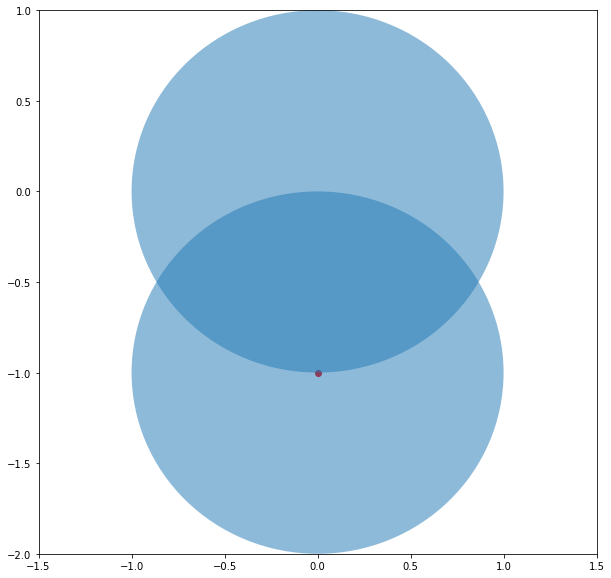

In [17]:
unit_circle = plt.Circle((0, 0), radius=1, alpha=0.5)
fig, ax = plt.subplots()
ax.add_artist(unit_circle)
plt.scatter([0], [-1], c='r')

unit_circle2 = plt.Circle((0, -1), radius=1, alpha=0.5)
ax.add_artist(unit_circle2)

plt.xlim([-1.5, 1.5])
plt.ylim([-2, 1])

- So, if we draw a chord with one end at the red dot and the chord has length greater than the radius, the other end of the chord must lie outside the intersection of the two circles

- So, we want to know the length of the portion of the upper circle's circumference that lies inside the intersection

(-1, 0)

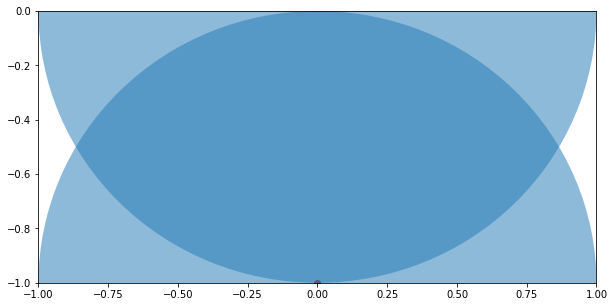

In [66]:
unit_circle = plt.Circle((0, 0), radius=1, alpha=0.5)
fig, ax = plt.subplots()
ax.add_artist(unit_circle)
plt.scatter([0], [-1], c='r')

unit_circle2 = plt.Circle((0, -1), radius=1, alpha=0.5)
ax.add_artist(unit_circle2)

plt.rcParams['figure.figsize'] = 5, 10

plt.xlim([-1, 1])
plt.ylim([-1, 0])

- If we draw points at the upper, lower, right, and left edges of the intersections we form two equilateral triangles with each side of unit length

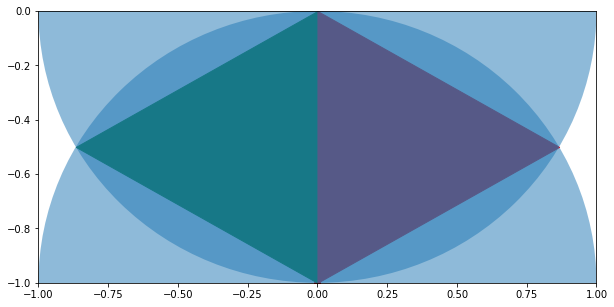

In [71]:
plt.rcParams['figure.figsize'] = 10, 5

unit_circle = plt.Circle((0, 0), radius=1, alpha=0.5)
fig, ax = plt.subplots()
ax.add_artist(unit_circle)
plt.scatter([0], [-1], c='r')

unit_circle2 = plt.Circle((0, -1), radius=1, alpha=0.5)
ax.add_artist(unit_circle2)

plt.xlim([-1, 1])
plt.ylim([-1, 0])

edge = np.sin(np.pi/3)
x_left = np.linspace(-edge, 0, 100)
y_left_upper = -0.5 + 0.5*(1 + x_left/edge)
y_left_lower = -0.5 - 0.5*(1 + x_left/edge)
plt.fill_between(x_left, y_left_upper, y_left_lower, color = 'g')

x_right = (-x_left)[::-1]
y_right_upper = y_left_upper[::-1]
y_right_lower = y_left_lower[::-1]
plt.fill_between(x_right, y_right_upper, y_right_lower, color = 'r')

- We know that every angle in an equilateral triangle is 60 degrees
    - This means that the the top angles from the green and red triangles combined are 120 degrees
        - So the proportion of the circumference that lies in the intersection is equal to 120/360 = 1/3
    
**Therefore, the probability that the length of the chord is greater than the radius is 2/3**

____

- Let's create a bunch of random chords and test this result

In [31]:
n_trials = 1000000
x = 0
y = -1
array_random_angles = np.random.uniform(0, 2*np.pi, size=n_trials)
array_random_x = np.cos(array_random_angles)
array_random_y = np.sin(array_random_angles)
array_distance = np.sqrt((array_random_x-x)**2 + (array_random_y-y)**2)

In [72]:
np.mean(array_distance>1)

0.666925

- Eyyyy